In [109]:
import sportsdataverse as sdv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [74]:
df_shots = pd.read_csv("/Users/keltim01/git_repos/TK5/soc-viz-of-the-week/10172022/data/10172022_mls.csv", index_col=0)

In [75]:
df_shots.head()

,teamId,playerId,playerName,min,xG,eventType,teamColor,match_id,isOwnGoal,x,y,situation,teamName
0,6001,750922,Artur,2,0.010215,AttemptSaved,#808010,3787426,False,98.245616,23.368663,FromCorner,Columbus Crew
1,6001,322965,Lucas Zelarayan,3,0.065710,Miss,#808010,3787426,False,85.816176,33.847499,RegularPlay,Columbus Crew
2,6001,416124,Milos Degenek,6,0.110263,Miss,#808010,3787426,False,97.377193,32.169999,FromCorner,Columbus Crew
3,6001,281628,Pedro Santos,7,0.031801,AttemptSaved,#808010,3787426,False,81.809225,48.975287,RegularPlay,Columbus Crew
4,6001,1166273,Miguel Berry,8,0.038990,Goal,#808010,3787426,False,86.782355,38.200237,RegularPlay,Columbus Crew


In [76]:
players = [
    'Karol Swiderski',
    'Hany Mukhtar',
    'Cristian Arango',
    'Sebastian Driussi',
    'Jeremy Ebobisse',
    'Luiz Araujo'
]

In [77]:
df_shots_cleaned = df_shots.loc[df_shots['playerName'].isin(players)]

In [78]:
df_shots_cleaned.to_csv('data/viz-buzz-mls-shotmaps-cleaned.csv')

In [79]:
df_nhl_schedule = sdv.nhl.load_nhl_schedule(seasons=range(2023,2024))

  0%|          | 0/1 [00:00<?, ?it/s]/Users/keltim01/git_repos/TK5/sportsdataverse-py/sportsdataverse/nhl/nhl_loaders.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


In [80]:
df_nhl_schedule.shape

(955, 28)

In [81]:
df_nhl_pbp = sdv.nhl.load_nhl_pbp(seasons=range(2023,2024))

  0%|          | 0/1 [00:00<?, ?it/s]/Users/keltim01/git_repos/TK5/sportsdataverse-py/sportsdataverse/nhl/nhl_loaders.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
100%|██████████| 1/1 [00:05<00:00,  5.46s/it]


In [90]:
df_nhl_pbp_mtl = df_nhl_pbp[(df_nhl_pbp['home_abbreviation'] == 'MTL') | (df_nhl_pbp['away_abbreviation'] == 'MTL')]

In [91]:
df_nhl_pbp_mtl.event_type.unique()

array(['GAME_SCHEDULED', 'CHANGE', 'FACEOFF', 'GIVEAWAY', 'BLOCKED_SHOT',
       'HIT', 'SHOT', 'STOP', 'PENALTY', 'MISSED_SHOT', 'GOAL',
       'TAKEAWAY', 'PERIOD_END', 'GAME_END', 'CHALLENGE',
       'SHOOTOUT_COMPLETE'], dtype=object)

In [118]:
df_nhl_pbp_mtl_goals = df_nhl_pbp_mtl[(df_nhl_pbp_mtl['event_type'] == 'GOAL') | (df_nhl_pbp_mtl['event_type'] == 'SHOOTOUT_COMPLETE') | (df_nhl_pbp_mtl['event_type'] == 'GAME_SCHEDULED')]

In [119]:
df_nhl_pbp_mtl_goals = df_nhl_pbp_mtl_goals[['game_id','game_seconds', 'home_score', 'away_score', 'home_abbreviation', 'away_abbreviation', 'event_type']]

In [120]:
shootout_games = df_nhl_pbp_mtl_goals.loc[df_nhl_pbp_mtl_goals['event_type'] == "SHOOTOUT_COMPLETE", 'game_id'].tolist()

In [121]:
df_shootout_games_results = df_nhl_schedule.loc[df_nhl_schedule['game_id'].isin(shootout_games), ['game_id','away_score', 'home_score']]

In [122]:
for index, row in df_shootout_games_results.iterrows():
    if row['away_score'] > row['home_score']:
        df_nhl_pbp_mtl_goals.loc[(df_nhl_pbp_mtl_goals['game_id'] == row['game_id']) & (df_nhl_pbp_mtl_goals['event_type'] == "SHOOTOUT_COMPLETE") ,['away_score', 'home_score']] = [row['away_score'], row['home_score']]


In [123]:
df_nhl_pbp_mtl_goals.loc[df_nhl_pbp_mtl_goals['home_abbreviation'] == 'MTL', 'mtl_score'] = df_nhl_pbp_mtl_goals['home_score']
df_nhl_pbp_mtl_goals.loc[df_nhl_pbp_mtl_goals['away_abbreviation'] == 'MTL', 'mtl_score'] = df_nhl_pbp_mtl_goals['away_score']
df_nhl_pbp_mtl_goals.loc[df_nhl_pbp_mtl_goals['home_abbreviation'] == 'MTL', 'opp_score'] = df_nhl_pbp_mtl_goals['away_score']
df_nhl_pbp_mtl_goals.loc[df_nhl_pbp_mtl_goals['away_abbreviation'] == 'MTL', 'opp_score'] = df_nhl_pbp_mtl_goals['home_score']

In [124]:
df_nhl_pbp_mtl_goals.drop(columns=['home_score', 'away_score', 'home_abbreviation', 'away_abbreviation'], inplace=True)

In [125]:
df_nhl_pbp_mtl_goals[['mtl_score', 'opp_score']] = df_nhl_pbp_mtl_goals[['mtl_score', 'opp_score']].astype(int)

In [127]:
df_nhl_pbp_mtl_goals['score_diff'] = df_nhl_pbp_mtl_goals['mtl_score'] - df_nhl_pbp_mtl_goals['opp_score']

In [128]:
df_nhl_pbp_mtl_goals['total_goals'] = df_nhl_pbp_mtl_goals['mtl_score'] + df_nhl_pbp_mtl_goals['opp_score']

In [129]:
df_nhl_pbp_mtl_goals.to_csv('data/viz-buzz-nhl-goal-tree.csv')

/var/folders/ts/3wmv3bq14n37zqx8km69cxtm0000gn/T/ipykernel_6368/418980752.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_nhl_pbp_mtl_goals['score_diff'], df_nhl_pbp_mtl_goals['total_goals'], cmap='RdYlGn', s=100)


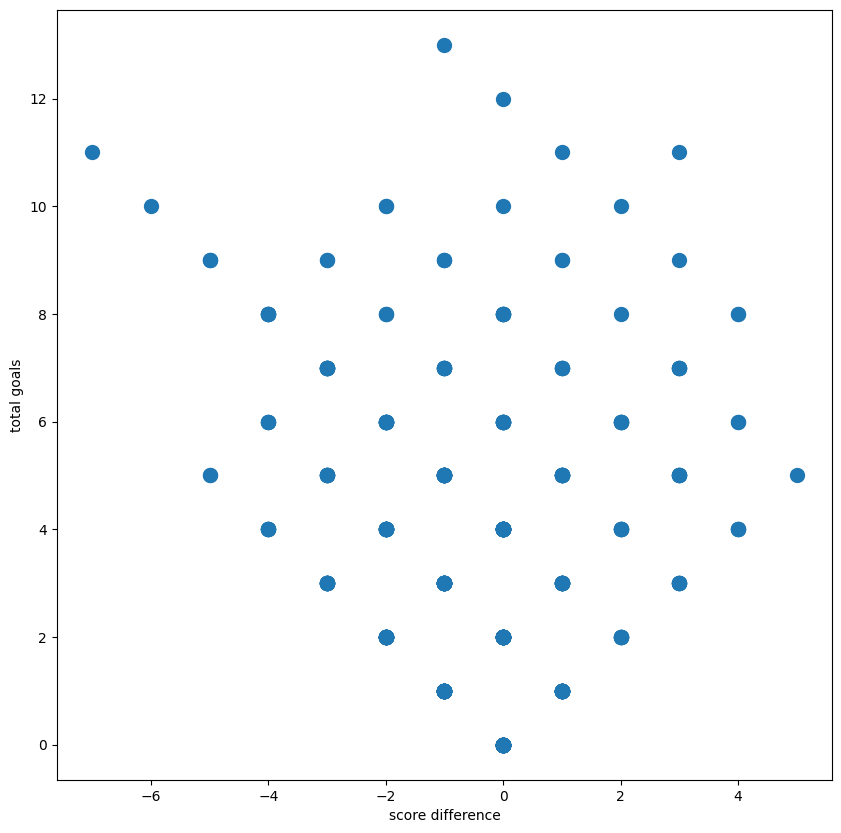

In [130]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df_nhl_pbp_mtl_goals['score_diff'], df_nhl_pbp_mtl_goals['total_goals'], cmap='RdYlGn', s=100)
plt.xlabel('score difference')
plt.ylabel('total goals')
fig.savefig('viz-buzz-nhl-goal-tree.png')